# **Class Assignment: Prerequisite Review (20 points)**

#### **Meg Bucich**


---

**IMPORTANT**:
- Before starting the lab, save a copy to your google drive by navigating to `File > Save a copy in Drive` <br>

<br>


**Instructions**: Complete the in-class assignment below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- Your completed assignment must be submitted to Canvas as a .ipynb file by the deadline listed on Canvas
---

<br>

####<font color=red>Organized</font>
* Answers should be organized in the following format for organization and readability

<br>

```
# 1.
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2.
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 1</font>  (2 points)

We are interested in exploring the distribution of standardized math test scores.

1. Load the dataset of from this [link](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/StudentsPerformance.csv)

2. Plot a histogram of the math scores from the dataset.

3. In complete sentences, describe what you observe from the histogram (e.g., Does the distribution appear normal? Is the distribution symmetric or skewed? etc.)

In [2]:
#1
data = read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/StudentsPerformance.csv")

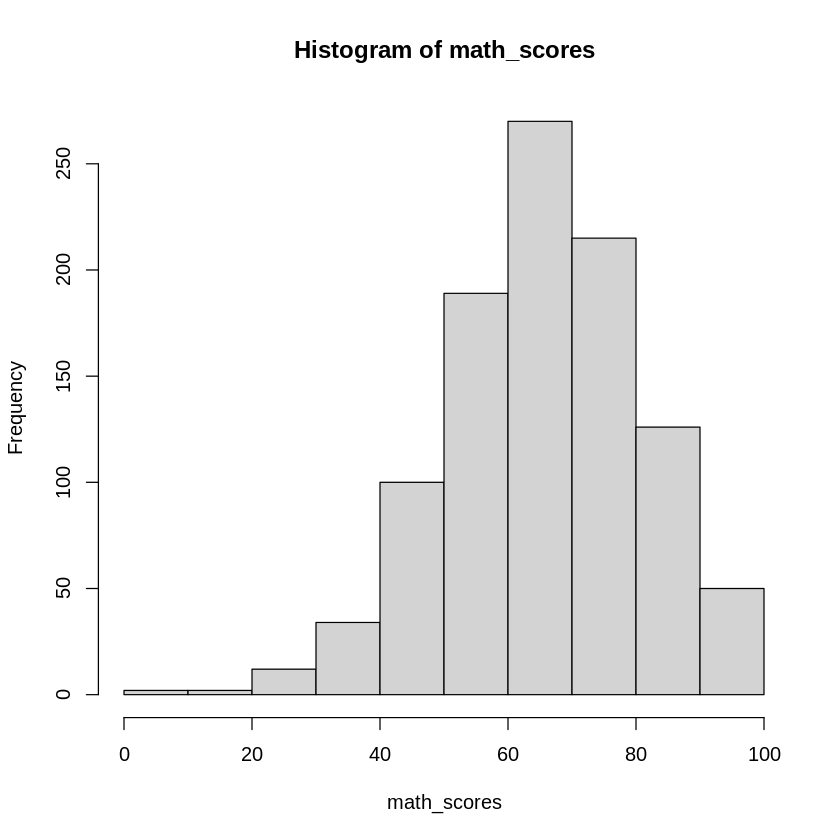

In [3]:
#2
math_scores = data$math.score
hist(math_scores)

#3
The histogram appears normal in shape but skewed left. if it were symmetrical normal we would expect to see the same frequency on the upper half as the lower half. instead we can see that more studnets scored above average than below. The mean sits at values between 60 and 70 percent whichg is pretty good, with more students scoring between 70 and 100 than 0 to 60.

<br>

---

<br>






####<font color=red>Task 2</font>  (4 points)

1. By "hand" (in R), create a 95% confidence interval for the true population average math score. Note you must use the `qt()` function to find the quantiles of the t-distribution.

2. Verify you have the correct answer using the `confint` object from the built-in `t.test()` R function.

3. Interpret the confidence interval in complete sentences.

4. Based on the confidence interval, is the true population average math score significantly greater than 66 points? Explain your answer in complete sentences.

#1


In [4]:
#1
n = length(math_scores)
x_bar = mean(math_scores)
s = sd(math_scores)
t_value = qt(1-.05/2,n-1)
upper = x_bar + t_value * (s/sqrt(n))
lower = x_bar - t_value * (s/sqrt(n))
print('95% confidence interval')
print(c(lower,upper))

[1] "95% confidence interval"
[1] 65.14806 67.02994


#2


In [5]:
# 2
t_test = t.test(math_scores)
print(t_test$conf.int)

[1] 65.14806 67.02994
attr(,"conf.level")
[1] 0.95


#3
we are 95% sure that the true population mean math score is within the interval above.


#4
66% falls within our 95% confidence interval so we are unable to say the true population average math score is significantly greater than 66.

<br>

---

<br>






####<font color=red>Task 3</font>  (4 points)

1. By "hand" (in R), create a 90% confidence interval for the true population average math score. Note you must use the `qt()` function to find the quantiles of the t-distribution.

2. Verify you have the correct answer the built-in `t.test()` R function (e.g., `t.test(x, conf.level = 0.90)`).

3. Interpret the confidence interval in complete sentences.

4. Is the confidence interval wider or narrower than the 95% confidence interval from Task 2? Explain in complete sentences.

In [6]:
#1
n = length(math_scores)
x_bar = mean(math_scores)
s = sd(math_scores)
t_value = qt(1-.1/2,n-1)
upper = x_bar + t_value * (s/sqrt(n))
lower = x_bar - t_value * (s/sqrt(n))
print('90% confidence interval')
print(c(lower,upper))

[1] "90% confidence interval"
[1] 65.29956 66.87844


In [7]:
#2
t_test = t.test(math_scores,conf.level=.9)
print(t_test$conf.int)

[1] 65.29956 66.87844
attr(,"conf.level")
[1] 0.9


#3

we are 90% confident that the true population mean math score is within the interval above

#4


In [8]:
t_value_95 = qt(1-.05/2,n-1)
t_value_90 = qt(1-.1/2,n-1)

upper_95 = x_bar + t_value_95 * (s/sqrt(n))
lower_95 = x_bar - t_value_95 * (s/sqrt(n))
upper_90 = x_bar + t_value_90 * (s/sqrt(n))
lower_90 = x_bar - t_value_90 * (s/sqrt(n))
diff95 = upper_95 - lower_95
diff90 = upper_90 - lower_90
diff95
diff90

[1] 1.88188

[1] 1.578874

the 90% confidence interval is smaller than the 95% interval because we are less certain about the true mean. As we increase our confidence level we would expect to get a larger range of values for our true mean.

<br>

---

<br>






####<font color=red>Task 4</font>  (5 points)

By "hand" (in R), perform a t-test to determine if the true population average math score is significantly different from 0.

1. What are your null and alternative hypotheses? Answer in a text cell.

2. What is your t-statistic?

3. What is the p-value associated with this t-test? You must show that you have used the `pt()` function.

4. Verify you have the correct answers using the built-in `t.test()` R function.

5. Interpret the results of your t-test.


#1


$H_{0}: \mu = 0$ \
$H_{a}: \mu \neq 0$


In [19]:
#2
n = length(math_scores)
x_bar = mean(math_scores)
s = sd(math_scores)
t_value = (x_bar - 0) / (s/sqrt(n))
t_value

[1] 137.8294

In [20]:
#3
abs_t_value = abs(t_value)
one_tailed = 1 - pt(abs_t_value, df = n-1)
p_val = 2 * one_tailed
p_val

[1] 0

In [21]:
#4
t_test = t.test(math_scores,conf.level=.95)
t_test


	One Sample t-test

data:  math_scores
t = 137.83, df = 999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 65.14806 67.02994
sample estimates:
mean of x 
   66.089 


#5
when doing a hypothesis test to see if the mean is significantly different than zero, we obtained a very small p-value and a confidence interval that zero does not fall into. we reject the null that stated the true population mean was not significantly different than zero.

<br>

---

<br>






####<font color=red>Task 5</font>  (5 points)

By "hand" (in R), perform a t-test to determine if the true population average math score is significantly different from ***66***.

1. What are your null and alternative hypothesis?

2. What is your t-statistic?

3. What is the p-value associated with this t-test? You must show that you have used the `pt()` function.

4. Verify you have the correct answers using the built-in `t.test()` R function (`t.test(x, mu = 66)`).

5. Interpret the results of your t-test in complete sentences.


#1

$H_{0}: \mu = 66$ \
$H_{a}: \mu \neq 66$


In [13]:
#2
n = length(math_scores)
x_bar = mean(math_scores)
s = sd(math_scores)
t_value = (x_bar - 66) / (s/sqrt(n))
t_value

[1] 0.1856105

In [18]:
#3

abs_t_value = abs(t_value)
one_tailed = 1 - pt(abs_t_value, df = n-1)
p_val = 2 * one_tailed
p_val

[1] 0.8527879

In [15]:
#4
t_test = t.test(math_scores,conf.level=.95,mu=66)
t_test


	One Sample t-test

data:  math_scores
t = 0.18561, df = 999, p-value = 0.8528
alternative hypothesis: true mean is not equal to 66
95 percent confidence interval:
 65.14806 67.02994
sample estimates:
mean of x 
   66.089 


#5
when we ran a hypothesis test to see if the true population mean was significantly different than 66, we obtained a large p-value and a confidence interval that 66 falls into. that means we can fail to reject the null hypothesis.

<br>

---

<br>






#### **More Practice (optional but useful)**

By "hand" (in R), perform a t-test to determine if the true population average math score is significantly different the true population average reading score.

1. Subtract reading score from math score and store as another variable called `diff`. We need to test of the mean of the difference is different from 0.

2. What are your null and alternative hypotheses? Answer in a text cell.

3. What is your t-statistic?

4. What is the p-value associated with this t-test? You must show that you have used the `pt()` function.

5. Verify you have the correct answers using the built-in `t.test()` R function.

6. Interpret the results of your t-test.


<br>

---

<br>




